In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import seaborn 
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Reading the dataset
sales = pd.read_excel('Sales.xlsx')

#### Basic EDA

In [4]:
# Check data head
sales.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [5]:
# Check data tail
sales.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [6]:
# Check data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

We can see from the data above that we have total 7 float variables, 5 integers and 8 objects.

In [7]:
# Check summary of the data
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [8]:
# Check data type
sales.dtypes

CustID                    int64
AgentBonus                int64
Age                     float64
CustTenure              float64
Channel                  object
Occupation               object
EducationField           object
Gender                   object
ExistingProdType          int64
Designation              object
NumberOfPolicy          float64
MaritalStatus            object
MonthlyIncome           float64
Complaint                 int64
ExistingPolicyTenure    float64
SumAssured              float64
Zone                     object
PaymentMethod            object
LastMonthCalls            int64
CustCareScore           float64
dtype: object

In [9]:
# Check the shape of the data
sales.shape

(4520, 20)

As we have already aware about the fact that we have total no. of 4520 rows and 20 columns in it.

In [10]:
# Check for missing values.
sales.isnull().any()

CustID                  False
AgentBonus              False
Age                      True
CustTenure               True
Channel                 False
Occupation              False
EducationField          False
Gender                  False
ExistingProdType        False
Designation             False
NumberOfPolicy           True
MaritalStatus           False
MonthlyIncome            True
Complaint               False
ExistingPolicyTenure     True
SumAssured               True
Zone                    False
PaymentMethod           False
LastMonthCalls          False
CustCareScore            True
dtype: bool

In [11]:
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

We see that there are missing values in the data set.

In [12]:
# Check for Duplicate values

dups = sales.duplicated()
print('Total no of duplicate values = %d' % (dups.sum()))
sales[dups]

Total no of duplicate values = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


In [13]:
# Check data head again
sales.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [14]:
# Treating missing values now
model1=sales['Age'].mode()[0]
model2=sales['CustTenure'].mode()[0]
model3=sales['MonthlyIncome'].mean()
model4=sales['ExistingPolicyTenure'].mode()[0]
model5=sales['SumAssured'].mean()
model6=sales['CustCareScore'].mode()[0]
model7=sales['NumberOfPolicy'].mode()[0]
sales['Age'].replace(np.nan,model1,inplace=True)
sales['CustTenure'].replace(np.nan,model2,inplace=True)
sales['MonthlyIncome'].replace(np.nan,model3,inplace=True)
sales['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
sales['SumAssured'].replace(np.nan,model5,inplace=True)
sales['CustCareScore'].replace(np.nan,model6,inplace=True)
sales['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [15]:
# Check missing values and duplicte values again
sales.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [16]:
# Check duplicate values for the same
sales.duplicated().sum()

0

In [17]:
# Check data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

#### Univariate Analysis

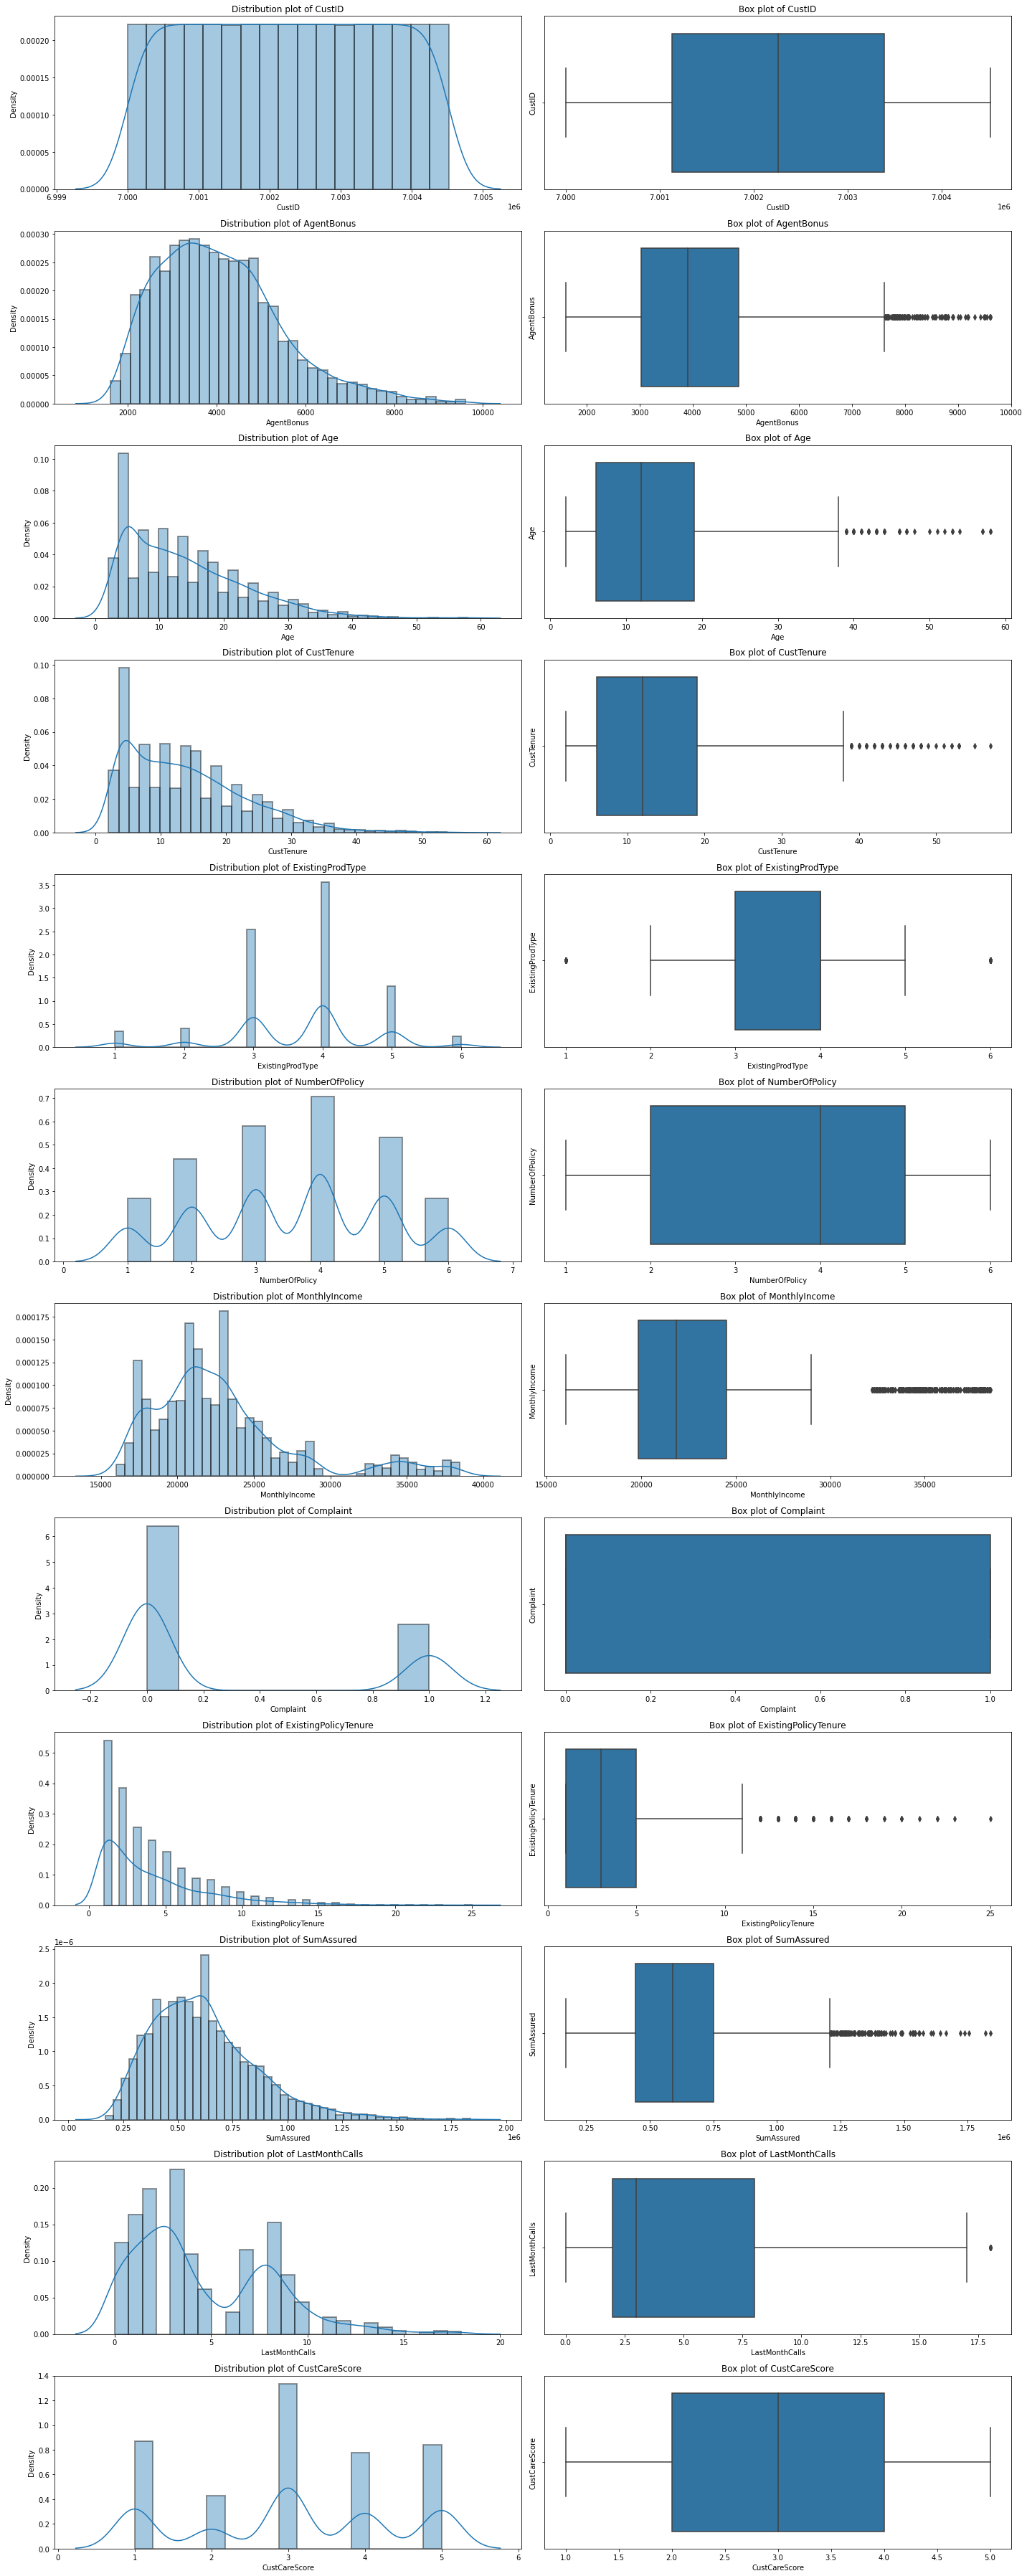

In [18]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,50))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

In [19]:
# Total no. of numerical columns objective variables

sales_cat = sales.select_dtypes(include = ['object'])
lstcategoriccolumns = list(sales_cat.columns.values)
columnlen=len(lstcategoriccolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  8


In [20]:
# Total no. of numerical columns (floats and integers)

sales_num = sales.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(sales_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  12


#### Treatment of Outliers

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in sales_num.columns:
    lr,ur=remove_outlier(sales[column])
    sales[column]=np.where(sales[column]>ur,ur,sales[column])
    sales[column]=np.where(sales[column]<lr,lr,sales[column])

#### Glimpse of Univariate Analysis after the treatment of Outliers

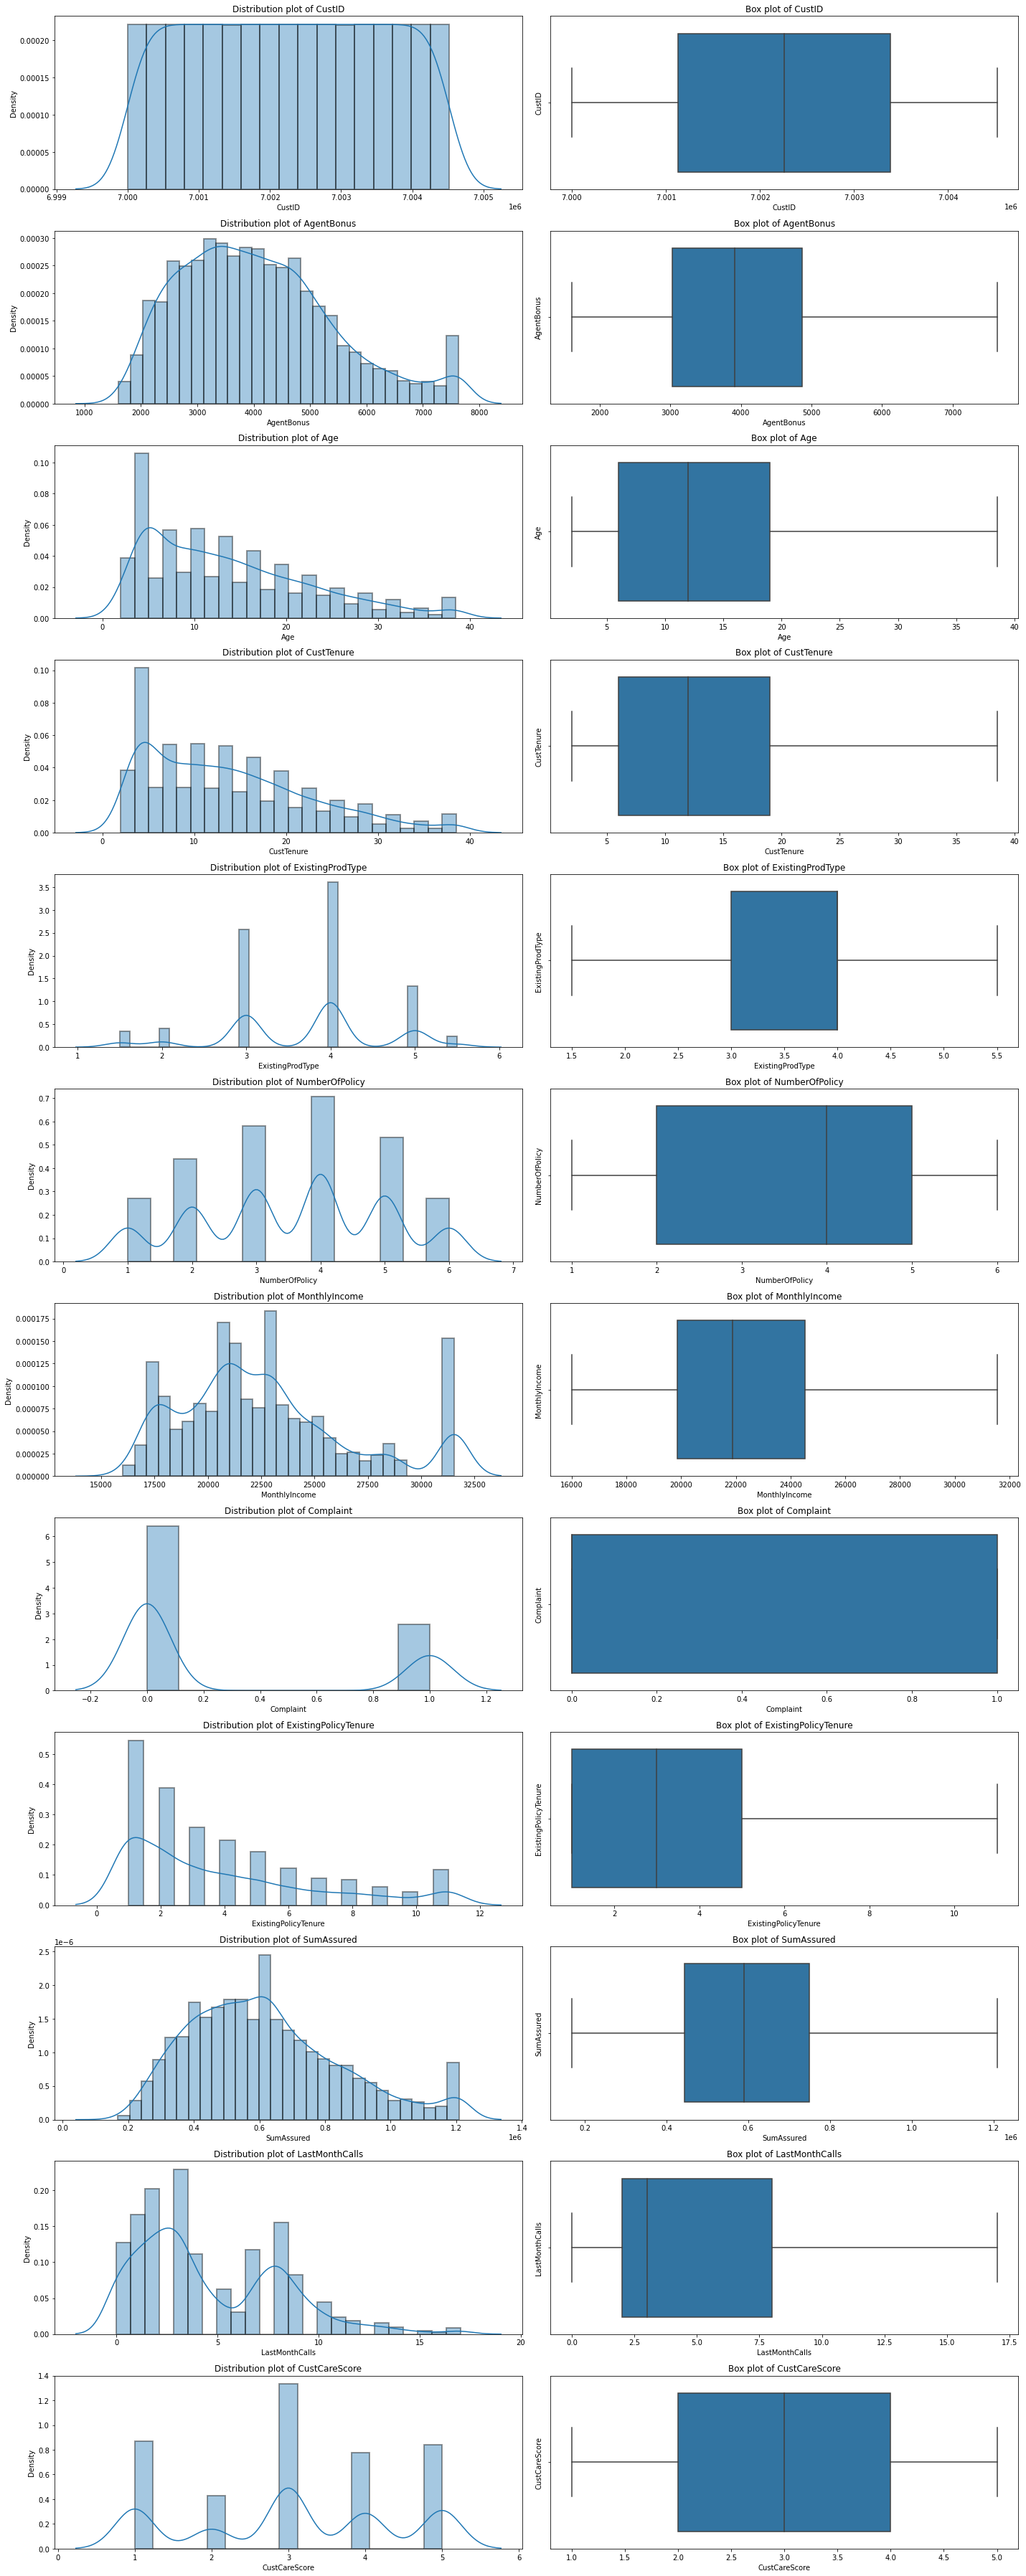

In [23]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,50))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

#### Bivariate Analysis

<AxesSubplot:xlabel='AgentBonus', ylabel='Age'>

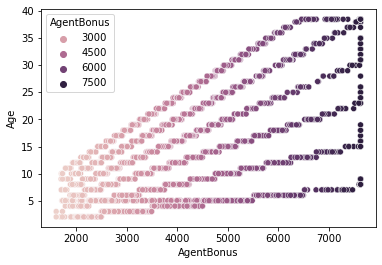

In [24]:
# Since Agent bonus is the target variable here so going for Agent bonus
# Age vs Agent bonus

sns.scatterplot(x='AgentBonus',y='Age',data=sales,hue='AgentBonus')

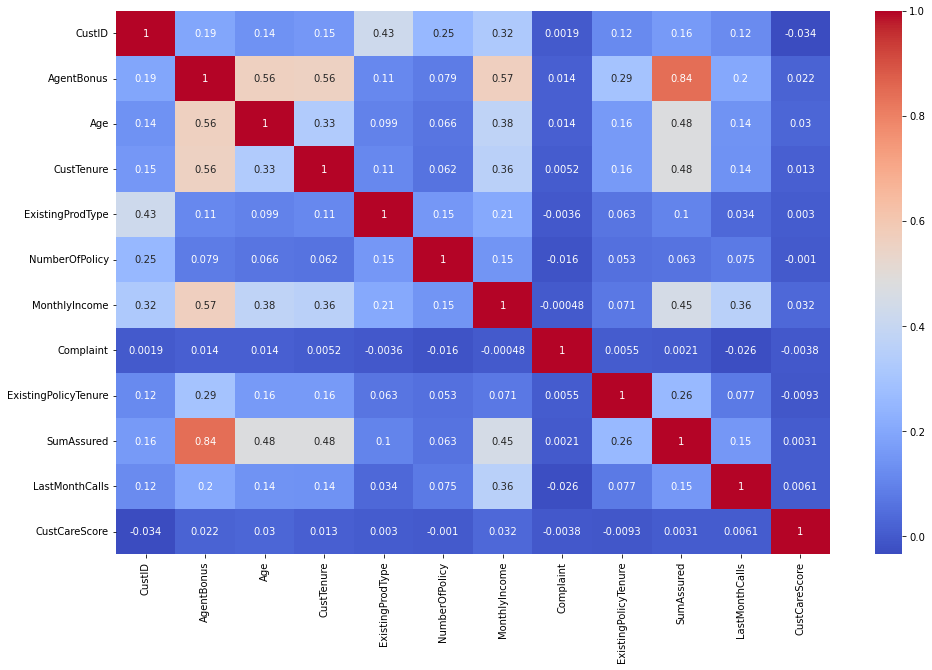

In [25]:
# Now checking for Correlations using Heatmap

plt.figure(figsize = (16,10))
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm');

#### Bivariate Analysis with Target variable

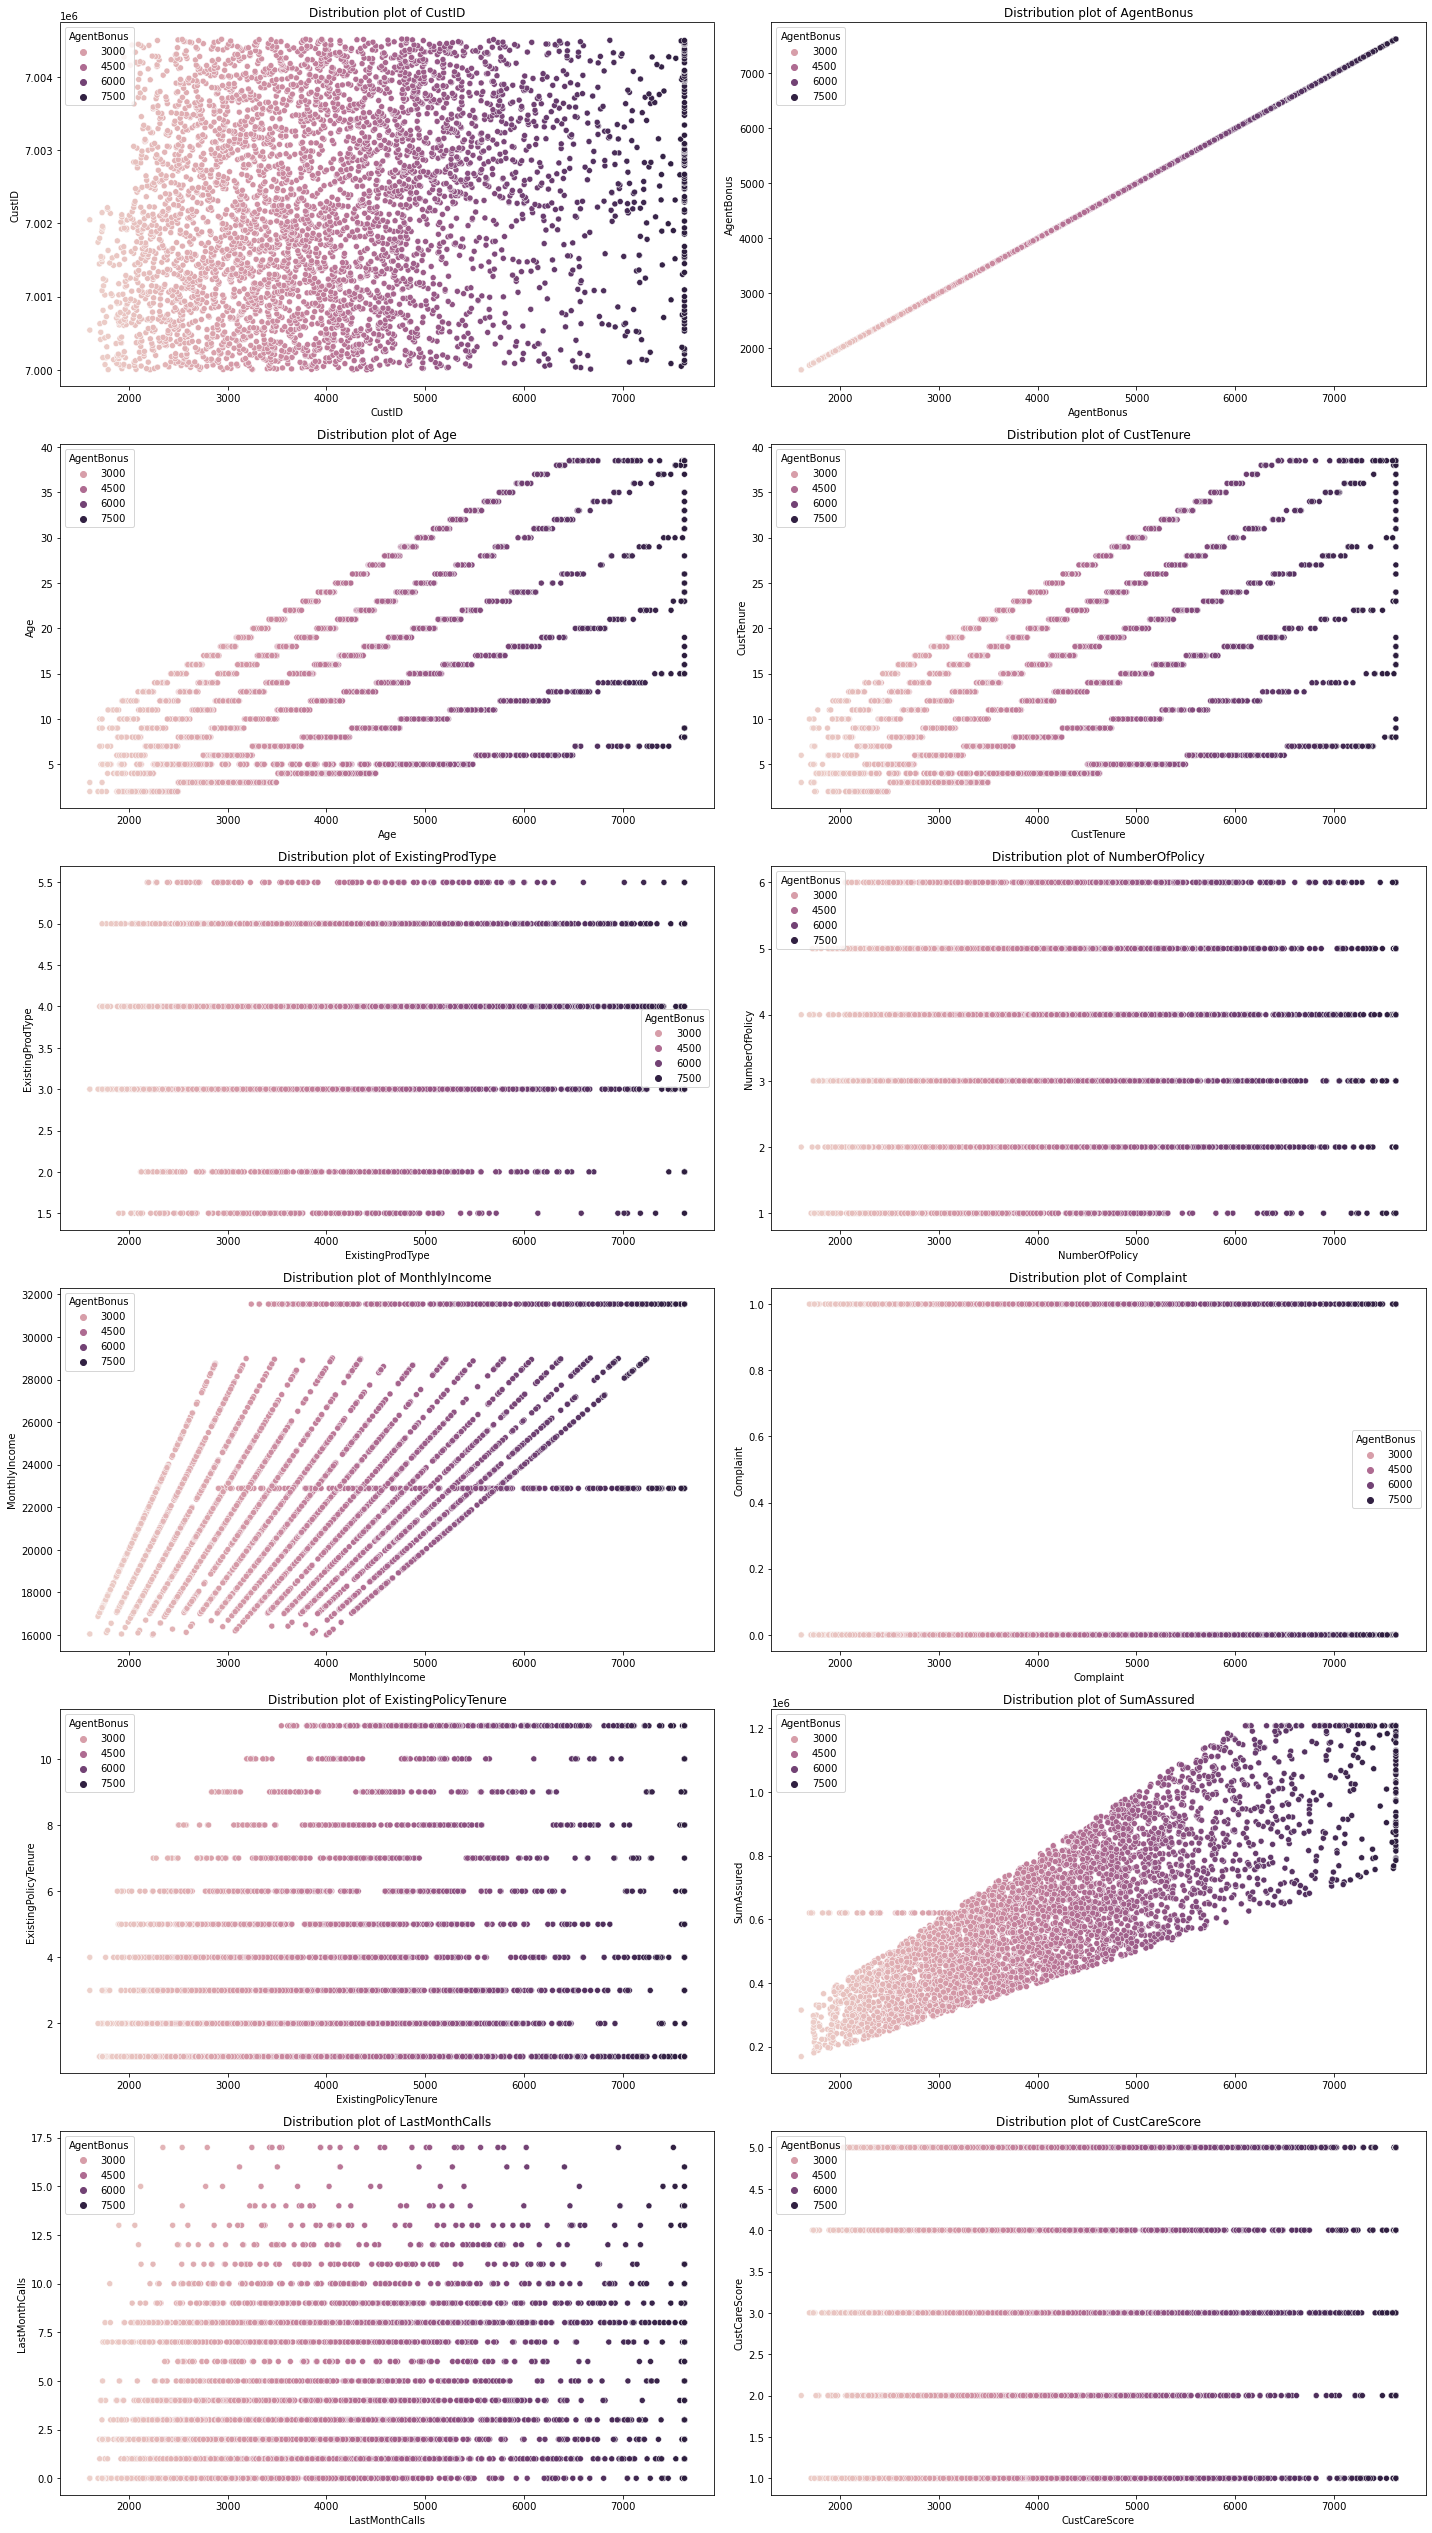

In [26]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,70))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.scatterplot('AgentBonus',sales[i],data=sales,hue='AgentBonus')
    c = c + 1
plt.tight_layout()
plt.show()

#### Examining different variables in the datset.

<AxesSubplot:xlabel='Age', ylabel='count'>

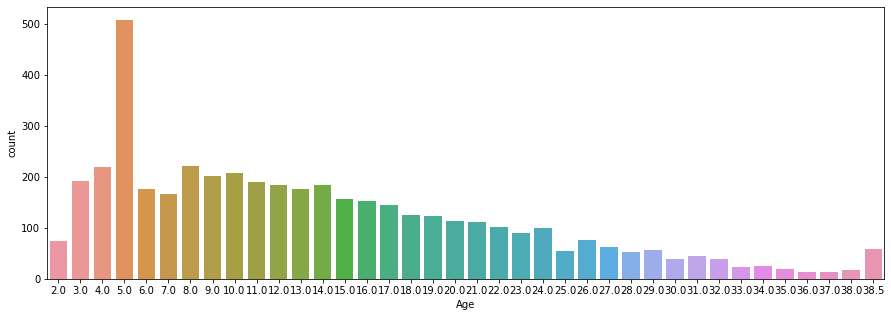

In [27]:
# Plotting the bar graph for the variable 'Age'

plt.figure(figsize=(15,5))
sns.countplot(sales['Age'])

<AxesSubplot:xlabel='Zone', ylabel='count'>

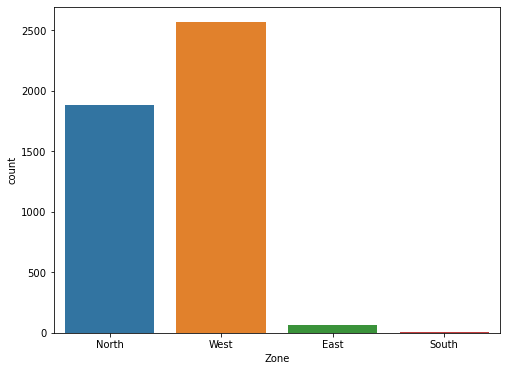

In [28]:
# Plotting the bar plots for the variable Zone vs Counts
plt.figure(figsize=(8,6))
sns.countplot(sales['Zone'])

<AxesSubplot:xlabel='CustTenure', ylabel='count'>

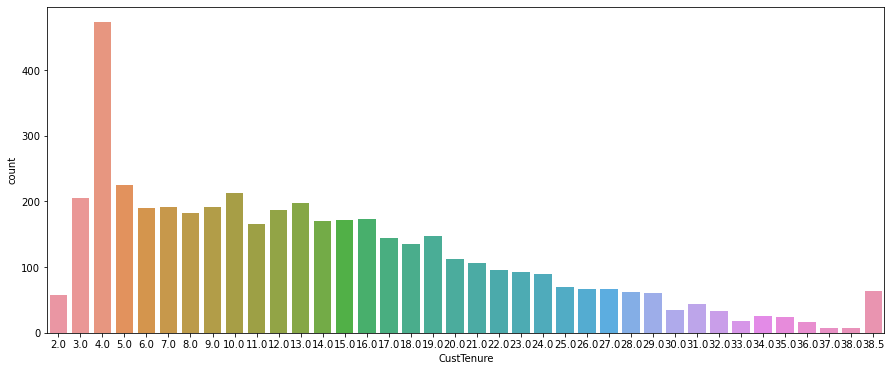

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(sales['CustTenure'])

<AxesSubplot:xlabel='Channel', ylabel='count'>

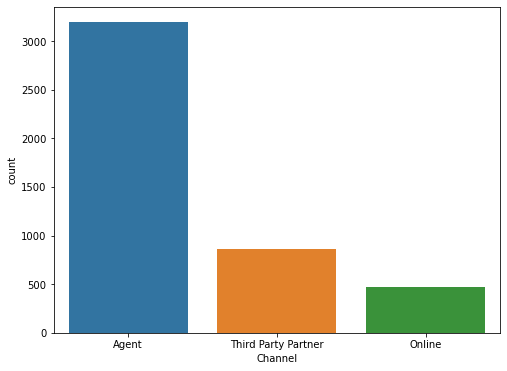

In [29]:
# Plotting the bar plots for the channel i.e. the medium .
plt.figure(figsize=(8,6))
sns.countplot(sales['Channel'])

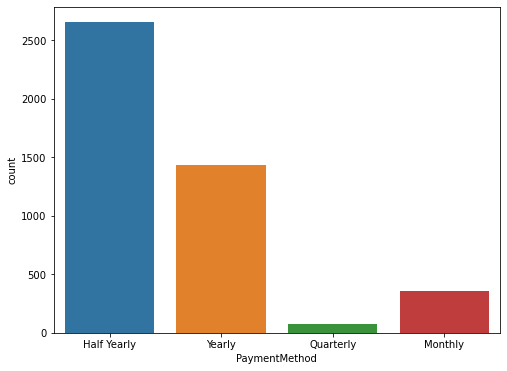

In [30]:
# Ploting the bar plots to visualise the pattern of poyments the customer has done.

plt.figure(figsize=(8,6))
sns.countplot(sales['PaymentMethod'])
labels = ['Half Yearly 0','Monthly 1']

### Case Study - 2

In [114]:
# We've to understand that 'Customer id' is insignificant for further analysis as it has not use for analyzing the data. 
# So, dropping the 'Customer id' column from the data.

sales.drop(['CustID'], axis=1, inplace=True)

In [115]:
sales = pd.get_dummies(sales, columns=lstcategoriccolumns,drop_first=True)

In [116]:
# Check the data to reconfirm if the changes has been made correctly. 

sales.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1.0,2.0,806761.000000,5.0,...,0,0,1,0,1,0,0,0,0,0
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0.0,3.0,294502.000000,7.0,...,0,0,0,0,1,0,0,0,0,1
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1.0,2.0,619999.699267,0.0,...,0,0,0,1,1,0,0,0,0,1
3,1791.0,11.0,4.0,3.0,3.0,17909.0,1.0,2.0,268635.000000,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2955.0,6.0,4.0,3.0,4.0,18468.0,0.0,4.0,366405.000000,2.0,...,0,0,0,0,0,0,1,0,0,0


We don't have customer ID any more in this data.

In [117]:
# Check for the NAN / missing values.
sales.isnull().any()

AgentBonus                       False
Age                              False
CustTenure                       False
ExistingProdType                 False
NumberOfPolicy                   False
MonthlyIncome                    False
Complaint                        False
ExistingPolicyTenure             False
SumAssured                       False
LastMonthCalls                   False
CustCareScore                    False
Channel_Online                   False
Channel_Third Party Partner      False
Occupation_Laarge Business       False
Occupation_Large Business        False
Occupation_Salaried              False
Occupation_Small Business        False
EducationField_Engineer          False
EducationField_Graduate          False
EducationField_MBA               False
EducationField_Post Graduate     False
EducationField_UG                False
EducationField_Under Graduate    False
Gender_Female                    False
Gender_Male                      False
Designation_Exe          

In [118]:
sales.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
ExistingProdType                 0
NumberOfPolicy                   0
MonthlyIncome                    0
Complaint                        0
ExistingPolicyTenure             0
SumAssured                       0
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Laarge Business       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
EducationField_Engineer          0
EducationField_Graduate          0
EducationField_MBA               0
EducationField_Post Graduate     0
EducationField_UG                0
EducationField_Under Graduate    0
Gender_Female                    0
Gender_Male                      0
Designation_Exe                  0
Designation_Executive            0
Designation_Manager              0
Designation_Senior M

Clearly we don't have any missing values in the data. So we are good to go

In [119]:
# Splitting the available data into Train and Test data.

X = sales.drop(['AgentBonus'], axis=1)
y = sales['AgentBonus']

In [120]:
# Splitting the X and y data into Training and Test set into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [121]:
# Now finding out the data available for Train and Test.

print('Train data',X_train.shape)
print('Test Data',X_test.shape)

Train data (3390, 38)
Test Data (1130, 38)


#### Linear Regression

In [122]:
# Using linear regression to find the best fid model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [123]:
# R square on training data
regression_model.score(X_train, y_train)

0.809122424509397

In [124]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7814619738647623

In [125]:
# Root Mean Square Error on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

596.9929773590675

In [126]:
# Root Mean Square Error on Testing data

predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

623.1013445806033

In [127]:
# Now concatenating the elements of X and Y into a single DataFrame.

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,AgentBonus
693,17.0,15.0,3.0,2.0,22379.000000,0.0,1.0,570217.0,4.0,2.0,...,1,0,0,0,0,1,0,0,0,2909.0
3521,18.0,14.0,5.0,5.0,22890.309991,0.0,2.0,398096.0,11.0,5.0,...,1,0,0,0,0,1,0,0,1,3523.0
3789,27.0,11.0,4.0,2.0,21776.000000,0.0,4.0,1034360.0,8.0,3.0,...,1,0,0,1,0,0,0,0,0,5444.0
2051,4.0,4.0,3.0,3.0,17821.000000,0.0,9.0,568846.0,2.0,3.0,...,1,0,0,0,0,1,0,0,0,3742.0
2404,15.0,15.0,5.0,3.0,23139.000000,0.0,1.0,704583.0,2.0,3.0,...,0,1,0,0,0,1,0,0,1,4859.0


In [128]:
# Highlighting all the column names which we have used as Training data.
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Laarge Business',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post Graduate', 'EducationField_UG',
       'EducationField_Under Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [129]:
# Now renaming the columns by reducing the space between their names. 

data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                            "Designation_Senior Manager":"Designation_Senior_Manager"}, 
                      inplace = True)

data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                           "Designation_Senior Manager":"Designation_Senior_Manager"},
                      inplace = True)

In [130]:
# Now checking the changes made on the column names. 
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third_Party_Partner', 'Occupation_Laarge Business',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post_Graduate', 'EducationField_UG',
       'EducationField_Under_Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [131]:
#  Exponential values
exp='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'


In [132]:
# Checking the linear model 1 parameters

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= exp, data = data_train).fit()
lm1.params

Intercept                       -308.862450
Age                               21.584280
CustTenure                        22.798862
ExistingProdType                 -74.096130
NumberOfPolicy                     0.098293
MonthlyIncome                      0.072213
Complaint                         29.571853
ExistingPolicyTenure              38.259870
SumAssured                         0.003531
LastMonthCalls                     0.647778
CustCareScore                      8.629110
Channel_Online                    24.987669
Channel_Third_Party_Partner       -3.289607
Occupation_Large_Business        -27.616164
Occupation_Salaried               -0.407712
Occupation_Small_Business         -0.459524
EducationField_Engineer          -17.658530
EducationField_MBA              -127.483172
EducationField_Post_Graduate      12.804460
EducationField_Under_Graduate    -33.509031
Gender_Male                       15.167335
Designation_Executive            105.419991
Designation_Manager             

In [133]:
# Printing the summary for the same
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     410.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:57:04   Log-Likelihood:                -26546.
No. Observations:                3390   AIC:                         5.316e+04
Df Residuals:                    3356   BIC:                         5.337e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [134]:
# Calculating Mean Square Error (MSE)
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [135]:
# Root Mean Square Error (RMSE)
np.sqrt(mse)

608.9209880058388

In [136]:
exp1='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online  + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + Gender_Male + Designation_Manager + Designation_Senior_Manager  + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'


In [137]:
# Checking the linear model 2 parameters

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= exp1, data = data_train).fit()
lm2.params

Intercept                      -134.512039
Age                              21.480889
CustTenure                       22.627846
ExistingProdType                -60.182839
NumberOfPolicy                    0.651886
MonthlyIncome                     0.067571
Complaint                        29.679669
ExistingPolicyTenure             38.701215
SumAssured                        0.003515
LastMonthCalls                    0.036937
CustCareScore                     9.095713
Channel_Online                   22.258761
EducationField_Engineer         -21.699018
EducationField_MBA             -118.147848
EducationField_Post_Graduate     20.266736
Gender_Male                      18.373475
Designation_Manager            -147.168605
Designation_Senior_Manager      -68.057342
MaritalStatus_Married           -51.562084
MaritalStatus_Single             16.745167
MaritalStatus_Unmarried        -150.330458
Zone_South                      156.922437
Zone_West                        -4.834612
PaymentMeth

In [138]:
# Checking the variance inflation factor values

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [139]:
vif_cal(input_data=data_train.drop('AgentBonus',axis=1))

Age  VIF =  1.41
CustTenure  VIF =  1.38
ExistingProdType  VIF =  4.75
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  5.24
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.12
SumAssured  VIF =  1.76
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
Occupation_Laarge Business  VIF =  62.39
Occupation_Large_Business  VIF =  101.63
Occupation_Salaried  VIF =  432.81
Occupation_Small_Business  VIF =  440.93
EducationField_Engineer  VIF =  18.07
EducationField_Graduate  VIF =  17.29
EducationField_MBA  VIF =  2.0
EducationField_Post_Graduate  VIF =  4.44
EducationField_UG  VIF =  1.57
EducationField_Under_Graduate  VIF =  2.58
Gender_Female  VIF =  4.77
Gender_Male  VIF =  4.54
Designation_Exe  VIF =  2.3
Designation_Executive  VIF =  8.62
Designation_Manager  VIF =  6.08
Designation_Senior_Manager  VIF =  2.82
Designation_VP  VIF =  1.84
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.89
Mari

So above is the the variance inflation factor values which influence the variable 'AgentBonus'.

In [140]:
vif_cal(input_data=data_train.drop(['AgentBonus','Occupation_Small_Business','Zone_North','Occupation_Large_Business','EducationField_Under_Graduate','Designation_VP','Occupation_Salaried','Designation_Executive','Channel_Third_Party_Partner'],axis=1))


Age  VIF =  1.4
CustTenure  VIF =  1.37
ExistingProdType  VIF =  3.73
NumberOfPolicy  VIF =  1.11
MonthlyIncome  VIF =  1.98
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.11
SumAssured  VIF =  1.74
LastMonthCalls  VIF =  1.18
CustCareScore  VIF =  1.02
Channel_Online  VIF =  1.02
Occupation_Laarge Business  VIF =  1.58
EducationField_Engineer  VIF =  1.68
EducationField_Graduate  VIF =  1.26
EducationField_MBA  VIF =  1.04
EducationField_Post_Graduate  VIF =  1.09
EducationField_UG  VIF =  1.26
Gender_Female  VIF =  4.74
Gender_Male  VIF =  4.51
Designation_Exe  VIF =  1.19
Designation_Manager  VIF =  1.22
Designation_Senior_Manager  VIF =  1.29
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.88
MaritalStatus_Unmarried  VIF =  1.36
Zone_South  VIF =  1.01
Zone_West  VIF =  1.02
PaymentMethod_Monthly  VIF =  1.98
PaymentMethod_Quarterly  VIF =  1.1
PaymentMethod_Yearly  VIF =  2.11


In [141]:
# Summary of linear model 2
lm2 = smf.ols(formula= exp1, data = data_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     541.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:57:08   Log-Likelihood:                -26550.
No. Observations:                3390   AIC:                         5.315e+04
Df Residuals:                    3364   BIC:                         5.331e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [142]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues


y_pred_1_Test = lm1.predict(data_test)
y_pred_2_Test = lm2.predict(data_test)

In [143]:
## Root Mean Square Error calculation on both Training set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 608.9209880058394
RMSE on Training Set for Model 2: 609.6576596195792


In [144]:
## Root Mean Square Error calculation on Test set

print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 633.9595739888327
RMSE on Test Set for Model 2: 632.831038053911


In [145]:
# Now copying all the predictor variables except target variable into X dataframe
X = sales.drop('AgentBonus', axis=1)

# Copying here the target variable setting aside all the training variables. into the Y dataframe.
y = sales[['AgentBonus']]

#### Examining the best fit models

In [146]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)

In [147]:
# Scaling the data for Artificial Neural Netwrok. If we don't do scaling it may give poor results.
# Basically Scaling is the process which makes the data computations easier

ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [148]:
rf=RandomForestClassifier()
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)
# We can also tweak the layer sizes accordingly

rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
# Scaling the data for Artificial Neural Network. If we don't do Scaling we won't have good results.  
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
            i.fit(x_train_scaled,y_train)
            scores_train.append(i.score(x_train_scaled, y_train))
            scores_test.append(i.score(x_test_scaled, y_test))
            rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
            rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor    0.000000  760.245991        1.000000    0.665318
Random Forest Regressor  190.483906  519.251378        0.980738    0.843873
ANN Regressor            497.488121  606.842724        0.868612    0.786756


#### Grid search on Decision Tree

In [149]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 50}


#### Grid search on Random Forest

In [150]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [152]:
# Looking for best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


#### Grid search on ANN

In [153]:
# Using Grid Search for ANN

param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    
    
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [154]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [155]:
# Looking again for best parameters
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [156]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor  495.236822  573.495484        0.869798    0.809549
Random Forest Regressor  540.850048  583.163906        0.844709    0.803073
ANN Regressor            497.488121  606.842724        0.868612    0.786756


In [157]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                    Imp
SumAssured                     0.430643
CustTenure                     0.147939
Age                            0.135314
MonthlyIncome                  0.122517
ExistingPolicyTenure           0.035902
Designation_VP                 0.031614
Designation_Executive          0.023948
Designation_Manager            0.013429
LastMonthCalls                 0.012173
Designation_Senior Manager     0.007222
Designation_Exe                0.004794
ExistingProdType               0.004702
MaritalStatus_Unmarried        0.003864
NumberOfPolicy                 0.003687
Gender_Female                  0.002636
CustCareScore                  0.002612
EducationField_UG              0.001531
EducationField_Under Graduate  0.001157
MaritalStatus_Married          0.001078
Zone_North                     0.001078
Zone_West                      0.001074
MaritalStatus_Single           0.001051
Gender_Male                    0.001030
Complaint                      0.001022


In [158]:
# Covariance Matrix

cov_matrix = np.cov(sales.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.84493685e+06  6.69771508e+03  6.65892831e+03 ... -2.71375490e+00
  -1.51489620e+00 -6.17078197e+00]
 [ 6.69771508e+03  7.74516142e+01  2.55636137e+01 ... -4.75225547e-03
   9.72658216e-03  2.25033634e-02]
 [ 6.65892831e+03  2.55636137e+01  7.68278262e+01 ... -4.52099983e-02
  -2.27395833e-02 -6.43301537e-05]
 ...
 [-2.71375490e+00 -4.75225547e-03 -4.52099983e-02 ...  7.22007571e-02
  -1.31715255e-03 -2.48525890e-02]
 [-1.51489620e+00  9.72658216e-03 -2.27395833e-02 ... -1.31715255e-03
   1.65351015e-02 -5.33558407e-03]
 [-6.17078197e+00  2.25033634e-02 -6.43301537e-05 ... -2.48525890e-02
  -5.33558407e-03  2.16652795e-01]]


In [159]:
# Now finding Eigen values and Eigen vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-4.96868364e-03 -8.47763654e-02  9.96377273e-01 ...  7.74188358e-06
   4.54913220e-06 -4.12247956e-06]
 [-1.83436629e-05 -4.59698025e-04  3.09133377e-03 ... -2.94485504e-05
  -1.31935556e-04 -3.76622203e-04]
 [-1.82075852e-05 -4.16254708e-04  3.18495983e-03 ...  3.13657941e-04
  -9.60911455e-06 -1.63276585e-04]
 ...
 [ 2.77466493e-08  1.73400211e-06  1.38987894e-05 ... -5.51772304e-02
  -9.62691825e-02  2.63483812e-01]
 [ 1.03840534e-08 -1.50060355e-07  2.26132609e-06 ...  2.54654857e-02
   1.00983201e-01 -2.45627486e-01]
 [ 1.23612622e-08 -1.15357663e-06 -9.08688890e-06 ...  1.62162890e-02
   7.17960192e-02 -9.55980953e-02]]

 Eigen Values 
%s [5.25624773e+10 1.25438878e+07 4.60460909e+05 5.37255287e+01
 5.15606382e+01 1.14652690e+01 7.78447605e+00 2.07921782e+00
 1.89030258e+00 9.49773376e-01 7.20262245e-01 4.84051024e-01
 4.29079835e-01 3.56045573e-01 3.22300861e-01 2.04121114e-01
 2.01244389e-01 1.57299406e-01 1.48911795e-01 1.18219969e-01
 9.67008128e-02 9.3977

In [160]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 99.97526512  99.99912394  99.99999975  99.99999985  99.99999995
  99.99999997  99.99999998  99.99999999  99.99999999  99.99999999
  99.99999999 100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.        ]


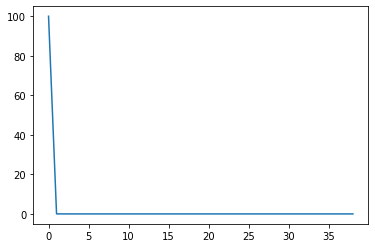

In [161]:
plt.plot(var_exp)

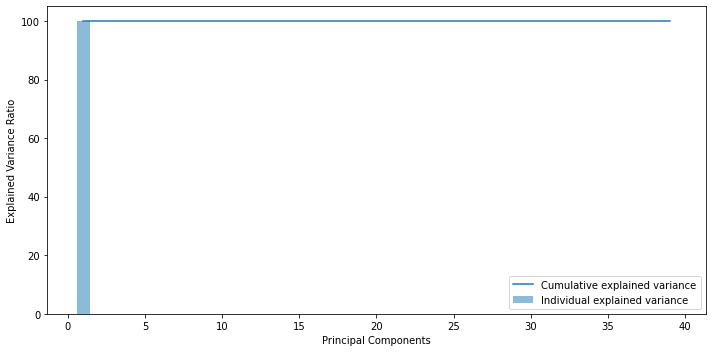

In [162]:
# Ploting

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [163]:
# Here Scikit learn with the help of PCA does all the above steps and maps the data to PCA dimensions in one go.
from sklearn.decomposition import PCA 

# We are generating only 7 PCA dimensions (dimensoinality reduced from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(sales)
data_reduced.transpose()

array([[ 1.90840212e+05, -3.21414771e+05,  4.05597862e+03, ...,
         5.14676654e+04,  3.28067312e+05,  8.44152829e+04],
       [-3.09425705e+03,  1.54335034e+01, -5.47952537e+03, ...,
        -1.25353335e+02, -5.09472478e+03,  6.16153022e+02],
       [-3.40928482e+02, -2.53998552e+02,  6.56993278e+02, ...,
        -5.17687765e+02, -4.46580641e+02,  2.30363328e+02],
       ...,
       [-1.28730414e+01, -6.40627787e+00, -1.56980444e+01, ...,
         5.27216588e-01, -4.25693286e-01, -3.04040461e+00],
       [ 6.27970239e-01,  3.20705104e+00, -3.21182833e+00, ...,
        -1.04393533e+00, -2.46820887e+00, -4.13756946e+00],
       [-2.52183743e+00, -7.28774664e-02, -2.14430852e+00, ...,
        -1.45636528e+00,  1.55273253e+00, -6.70165182e-01]])

In [164]:
# Now Checking the length of components
len(pca.components_)

7

In [165]:
sales_comp = pd.DataFrame(pca.components_,columns=list(sales))
sales_comp.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,0.004969,0.000018,0.000018,4.096192e-07,3.963344e-07,0.007719,4.066665e-09,0.000003,9.999579e-01,0.000002,...,2.597126e-07,9.509540e-08,-1.572729e-08,-9.357627e-08,4.259302e-08,-2.719102e-09,-2.774497e-08,-2.774665e-08,-1.038405e-08,-1.236126e-08
1,0.084776,0.000460,0.000416,4.809769e-05,5.363084e-05,0.996367,-1.491757e-07,-0.000039,-8.112389e-03,0.000330,...,2.747013e-05,5.368982e-06,6.042846e-06,-1.463639e-05,-3.473882e-06,-3.431926e-08,2.289574e-06,-1.734002e-06,1.500604e-07,1.153577e-06
2,0.996377,0.003091,0.003185,-3.173989e-05,-1.025798e-05,-0.084815,1.665722e-05,0.000763,-4.296308e-03,0.000022,...,4.735313e-06,-2.084629e-05,2.194863e-05,-1.005169e-05,-2.771328e-06,7.640408e-08,9.804823e-07,1.389879e-05,2.261326e-06,-9.086889e-06
3,0.004471,-0.731552,-0.681598,-6.916058e-03,-4.214439e-03,0.000246,-2.968038e-04,-0.003133,1.755570e-06,-0.008939,...,6.940800e-04,6.975936e-04,-1.707505e-03,1.336717e-03,1.177825e-03,-1.450078e-05,-1.075147e-03,2.268874e-04,2.721316e-06,-8.271978e-04
4,-0.000221,-0.681702,0.731607,2.273837e-03,-1.182040e-04,0.000027,-4.786010e-04,-0.000014,6.789840e-08,0.001940,...,-4.735274e-04,1.161504e-03,-1.965948e-03,5.810595e-04,7.810681e-04,2.116658e-05,-8.255934e-04,-5.913588e-04,-4.476488e-04,-2.580300e-04


<AxesSubplot:>

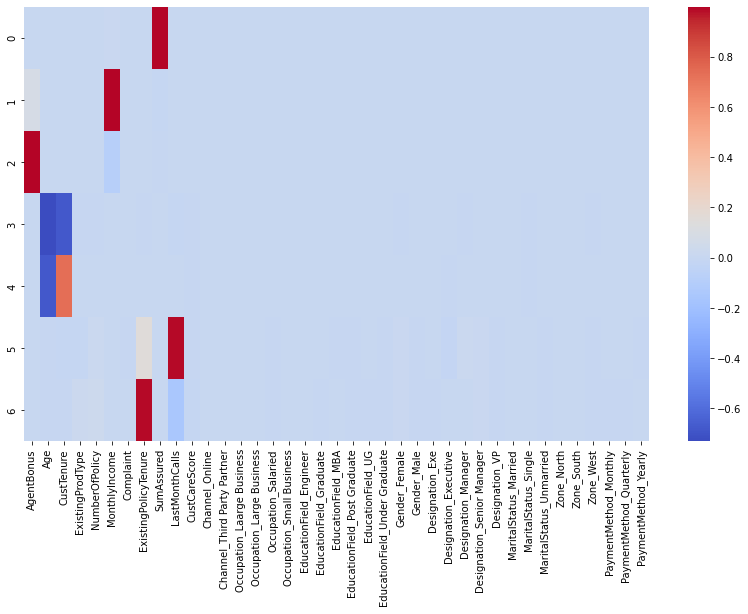

In [166]:
# Plotting a heat map for the same

plt.figure(figsize=(14,8))
sns.heatmap(sales_comp, cmap='coolwarm')